## 代辦事項：

In [1]:
# 導入模塊
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import sqlite3
import sys
import datetime
import math
sys.path.append('..')
# silence warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# sns.set(font='Taipei Sans TC Beta')

# 自定義模塊
import util.swingTrade as st

KeyboardInterrupt: 

In [ ]:
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 150)

# 要導入的資料

In [ ]:
df = st.getFullData(startDate='2015-01-01', columns=['成交值(千元)', '流通在外股數(千股)'])

# 處理未導入條件

## 價量

In [ ]:

try:
    df['K棒收點'] = (df['收盤價(元)'] - df['最低價(元)']) / (df['最高價(元)'] - df['最低價(元)'])
    df['開盤價(元)'] = df['開盤價(元)'][df['開盤價(元)'] != 'N.A.']
    df['本益比-TEJ'] = df['本益比-TEJ'][df['本益比-TEJ'] != 'N.A.']
    df['開盤價(元)'] = pd.to_numeric(df['開盤價(元)'])
    df['本益比-TEJ'] = pd.to_numeric(df['本益比-TEJ'])
    df['年月日'] = pd.to_datetime(df['年月日'] )
    df['當沖收益'] = ((df['收盤價(元)'] - df['開盤價(元)']) / df['收盤價(元)'])
    df = df.set_index(['年月日', '證券代碼'])
    df['漲跌幅'] = df.groupby('證券代碼')['收盤價(元)'].pct_change() * 100
    df['開收比'] = (df['收盤價(元)'] - df['開盤價(元)']) / df['開盤價(元)'] * 100
    df['成交值等級'] = df.groupby('年月日')['成交值(千元)'].rank(ascending=False)
    df = df[~df.index.duplicated()]
except Exception as e :
    print(e)

df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-01-05 1101 台泥   1637541.0   23.9737   23.9737   23.6422   23.7527   
           1102 亞泥   1637542.0   27.1345   27.1345   26.5765   26.6811   
           1103 嘉泥   1637543.0   10.7080   10.7836   10.5188   10.7836   
           1104 環泥   1637544.0   17.2562   17.2894   17.0234   17.2894   
           1108 幸福   1637545.0    7.7999    7.9135    7.7620    7.8756   
...                        ...       ...       ...       ...       ...   
2022-03-24 9951 皇田         NaN   73.5000   74.4000   73.5000   74.0000   
           9955 佳龍         NaN   33.2000   34.4000   31.7000   33.1500   
           9958 世紀鋼        NaN  111.0000  122.0000  111.0000  119.5000   
           9960 邁達康        NaN   25.4000   25.7000   25.4000   25.5000   
           9962 有益         NaN   21.0000   22.0000   20.8500   21.7000   

                     成交量(千股)  成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                               
2015-01-05 1101 台泥      2842   122244 -0.9217   0.0770     3692175   158763   
           1102 亞泥      2967   113776 -1.9231   0.0883     3361447   128575   
           1103 嘉泥       587     8256  0.7067   0.0756      776828    11069   
           1104 環泥       415    10709  0.7752   0.0674      615969    16015   
           1108 幸福       248     2577  0.9709   0.0613      404738     4209   
...                      ...      ...     ...      ...         ...      ...   
2022-03-24 9951 皇田        53     3984  0.5435   0.0708       74900     5543   
           9955 佳龍     18842   624908  3.5938  18.2563      103208     3421   
           9958 世紀鋼    15715  1862629  7.1749   6.7941      231305    27641   
           9960 邁達康       35      895  0.3937   0.1042       33593      857   
           9962 有益     12937   278941  4.3269  14.3394       90220     1958   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-01-05 1101 台泥    43.00   43.10 -0.9259  0.592   0.170     1489    14.88   
           1102 亞泥    38.25   38.45 -1.9418  0.479   0.158     1621    13.91   
           1103 嘉泥    14.20   14.25  0.7042  0.041   0.011      184     7.74   
           1104 環泥    25.90   26.00  0.7722  0.060   0.015      249    11.40   
           1108 幸福    10.35   10.40  0.9662  0.016   0.004      114    13.33   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-03-24 9951 皇田    73.90   74.00  0.5420  0.107   0.006       55    13.88   
           9955 佳龍    33.00   33.15  3.5307  0.006   0.246    10305      NaN   
           9958 世紀鋼  119.00  119.50  6.9292  0.051   0.734     9222    19.82   
           9960 邁達康   25.45   25.55  0.3929  0.016   0.001       35    11.43   
           9962 有益    21.65   21.70  4.2359  0.038   0.390     5735    14.00   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-01-05 1101 台泥   15.0800       1.42     1.4200  None     1.3000   
           1102 亞泥   17.9600       0.96     0.9600  None     1.6600   
           1103 嘉泥   12.9900       0.53     0.6400  None     2.5500   
           1104 環泥   11.5100       1.07     1.0700  None     2.7800   
           1108 幸福   15.4800       0.94     0.9300  None     0.8300   
...                      ...        ...        ...   ...        ...   
2022-03-24 9951 皇田   10.6241       1.78     1.8385  None     1.0878   
           9955 佳龍       NaN       2.25     2.2480  None     1.5665   
           9958 世紀鋼  24.0111       3.76     3.7658  None     2.9804   
           9960 邁達康  11.4286       1.70     1.6988  None     0.9636   
           9962 有益   20.3734       1.80     1.9025  None     0.9037   

                     股利殖利率-TSE   現金股利率  股價漲跌(元)     高低價差%  次日開盤參考價   

## 個股資券資料

In [ ]:
df_marginTrade = st.getMarginTrade(startDate='2015-01-01')
df_marginTrade['年月日'] = df_marginTrade['年月日'].str.removesuffix(' 00:00:00')
df_marginTrade['年月日'] = pd.to_datetime(df_marginTrade['年月日'])
df_marginTrade = df_marginTrade.set_index(['年月日', '證券代碼'])
df_marginTrade
# 融資使用率 ＝ 融資餘額 / 融資限額

index  融資餘額(張)   融資餘額(千元)  融資買進(張)  融資買進(千元)  融資賣出(張)  \
年月日        證券代碼                                                                
2015-01-05 1101 台泥   1497460   8550.0   367650.0    211.0   9073.00     94.0   
           1102 亞泥   1497461   3346.0   128319.0    192.0   7363.20      7.0   
           1103 嘉泥   1497462   5389.0    75661.6      9.0    126.36     48.0   
           1104 環泥   1497463   5298.0   136635.0      8.0    206.32     32.0   
           1108 幸福   1497464   3678.0    38140.9     46.0    477.02     55.0   
...                      ...      ...        ...      ...       ...      ...   
2022-01-26 9951 皇田   4123929   1061.0    79484.4      3.0    224.74      3.0   
           9955 佳龍   4123930    666.0    11132.7      5.0     83.58      0.0   
           9958 世紀鋼  4123931  15150.0  1598960.0    300.0  31662.70    211.0   
           9960 邁達康  4123932   1473.0    39061.9      1.0     26.52      1.0   
           9962 有益   4123933   3188.0    50442.1     12.0    189.87     94.0   

                     融資賣出(千元)  融資現金償還(張)  融資現金償還(千元)  融資增減(張)  融資增減(千元)  \
年月日        證券代碼                                                           
2015-01-05 1101 台泥    4042.00        0.0        0.00    117.0   5031.00   
           1102 亞泥     268.45        0.0        0.00    185.0   7094.75   
           1103 嘉泥     673.92        0.0        0.00    -39.0   -547.56   
           1104 環泥     825.28        0.0        0.00    -24.0   -618.96   
           1108 幸福     570.35        0.0        0.00     -9.0    -93.33   
...                       ...        ...         ...      ...       ...   
2022-01-26 9951 皇田     224.74        0.0        0.00      0.0      0.00   
           9955 佳龍       0.00        0.0        0.00      5.0     83.58   
           9958 世紀鋼  22269.40       28.0     2955.18     61.0   6438.07   
           9960 邁達康     26.52        0.0        0.00      0.0      0.00   
           9962 有益    1487.32        0.0        0.00    -82.0  -1297.44   

                     融資增減比率  融資使用率      融資限額  融券餘額(張)  融券餘額(千元)  融券買進(張)  \
年月日        證券代碼                                                            
2015-01-05 1101 台泥     1.39   0.93  923043.0    258.0  11094.00     24.0   
           1102 亞泥     5.85   0.40  840361.0     49.0   1879.15      4.0   
           1103 嘉泥    -0.72   2.77  194207.0     72.0   1010.88      0.0   
           1104 環泥    -0.45   3.44  153992.0     27.0    696.33      3.0   
           1108 幸福    -0.24   3.63  101184.0     40.0    414.80      0.0   
...                     ...    ...       ...      ...       ...      ...   
2022-01-26 9951 皇田     0.00   5.66   18725.0      1.0     74.91      0.0   
           9955 佳龍     0.76   2.58   25802.0      1.0     16.72      0.0   
           9958 世紀鋼    0.40  26.20   57819.0    258.0  27229.90      4.0   
           9960 邁達康    0.00  17.53    8398.0      0.0      0.00      0.0   
           9962 有益    -2.51  14.13   22555.0     13.0    205.69      0.0   

                     融券買進(千元)  融券賣出(張)  融券賣出(千元)  融券現券償還(張)  融券現券償還(千元)  \
年月日        證券代碼                                                           
2015-01-05 1101 台泥    1032.00     20.0    860.00        0.0         0.0   
           1102 亞泥     153.40      0.0      0.00        0.0         0.0   
           1103 嘉泥       0.00      0.0      0.00        0.0         0.0   
           1104 環泥      77.37      0.0      0.00        0.0         0.0   
           1108 幸福       0.00      0.0      0.00        0.0         0.0   
...                       ...      ...       ...        ...         ...   
2022-01-26 9951 皇田       0.00      0.0      0.00        0.0         0.0   
           9955 佳龍       0.00      0.0      0.00        0.0         0.0   
           9958 世紀鋼    422.17    186.0  19630.80        0.0         0.0   
           9960 邁達康      0.00      0.0      0.00        0.0         0.0   
           9962 有益       0.00      1.0     15.82        0.0         0.0   

                     融券增減(張)  融券增減(千元)  融

In [ ]:
df = pd.merge(df, df_marginTrade[['融資餘額(張)', '融資餘額(千元)', '融資買進(張)', '融資買進(千元)', '融資賣出(張)', '融資賣出(千元)', '融資增減(張)', '融資增減(千元)', '融資增減比率', '券資比', '融資(買+賣)/成交量 %']], on=['年月日', '證券代碼'], how='left')
df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-01-05 1101 台泥   1637541.0   23.9737   23.9737   23.6422   23.7527   
           1102 亞泥   1637542.0   27.1345   27.1345   26.5765   26.6811   
           1103 嘉泥   1637543.0   10.7080   10.7836   10.5188   10.7836   
           1104 環泥   1637544.0   17.2562   17.2894   17.0234   17.2894   
           1108 幸福   1637545.0    7.7999    7.9135    7.7620    7.8756   
...                        ...       ...       ...       ...       ...   
2022-03-24 9951 皇田         NaN   73.5000   74.4000   73.5000   74.0000   
           9955 佳龍         NaN   33.2000   34.4000   31.7000   33.1500   
           9958 世紀鋼        NaN  111.0000  122.0000  111.0000  119.5000   
           9960 邁達康        NaN   25.4000   25.7000   25.4000   25.5000   
           9962 有益         NaN   21.0000   22.0000   20.8500   21.7000   

                     成交量(千股)  成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                               
2015-01-05 1101 台泥      2842   122244 -0.9217   0.0770     3692175   158763   
           1102 亞泥      2967   113776 -1.9231   0.0883     3361447   128575   
           1103 嘉泥       587     8256  0.7067   0.0756      776828    11069   
           1104 環泥       415    10709  0.7752   0.0674      615969    16015   
           1108 幸福       248     2577  0.9709   0.0613      404738     4209   
...                      ...      ...     ...      ...         ...      ...   
2022-03-24 9951 皇田        53     3984  0.5435   0.0708       74900     5543   
           9955 佳龍     18842   624908  3.5938  18.2563      103208     3421   
           9958 世紀鋼    15715  1862629  7.1749   6.7941      231305    27641   
           9960 邁達康       35      895  0.3937   0.1042       33593      857   
           9962 有益     12937   278941  4.3269  14.3394       90220     1958   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-01-05 1101 台泥    43.00   43.10 -0.9259  0.592   0.170     1489    14.88   
           1102 亞泥    38.25   38.45 -1.9418  0.479   0.158     1621    13.91   
           1103 嘉泥    14.20   14.25  0.7042  0.041   0.011      184     7.74   
           1104 環泥    25.90   26.00  0.7722  0.060   0.015      249    11.40   
           1108 幸福    10.35   10.40  0.9662  0.016   0.004      114    13.33   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-03-24 9951 皇田    73.90   74.00  0.5420  0.107   0.006       55    13.88   
           9955 佳龍    33.00   33.15  3.5307  0.006   0.246    10305      NaN   
           9958 世紀鋼  119.00  119.50  6.9292  0.051   0.734     9222    19.82   
           9960 邁達康   25.45   25.55  0.3929  0.016   0.001       35    11.43   
           9962 有益    21.65   21.70  4.2359  0.038   0.390     5735    14.00   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-01-05 1101 台泥   15.0800       1.42     1.4200  None     1.3000   
           1102 亞泥   17.9600       0.96     0.9600  None     1.6600   
           1103 嘉泥   12.9900       0.53     0.6400  None     2.5500   
           1104 環泥   11.5100       1.07     1.0700  None     2.7800   
           1108 幸福   15.4800       0.94     0.9300  None     0.8300   
...                      ...        ...        ...   ...        ...   
2022-03-24 9951 皇田   10.6241       1.78     1.8385  None     1.0878   
           9955 佳龍       NaN       2.25     2.2480  None     1.5665   
           9958 世紀鋼  24.0111       3.76     3.7658  None     2.9804   
           9960 邁達康  11.4286       1.70     1.6988  None     0.9636   
           9962 有益   20.3734       1.80     1.9025  None     0.9037   

                     股利殖利率-TSE   現金股利率  股價漲跌(元)     高低價差%  次日開盤參考價   

In [ ]:
# 篩選 是否有波段驅使之融資 ： 過去半年融資餘額最高 相較 最低 增加了50%
df['過去半年融資餘額最高張數'] = df.groupby('證券代碼')['融資餘額(張)'].transform(lambda x: x.rolling(60).max())
df['過去半年融資餘額最低張數'] = df.groupby('證券代碼')['融資餘額(張)'].transform(lambda x: x.rolling(60).min())
df['是否有波段驅使之融資'] = np.where(df['過去半年融資餘額最高張數'] / df['過去半年融資餘額最低張數'] > 1.5, 1, 0)

In [ ]:
# df
# df.loc[:, '9951 皇田', :]
df.loc[:, '9951 皇田', :]

,index,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,流通在外股數(千股),市值(百萬元),最後揭示買價,最後揭示賣價,報酬率-Ln,市值比重％,成交值比重％,成交筆數(筆),本益比-TSE,本益比-TEJ,股價淨值比-TSE,股價淨值比-TEJ,漲跌停,股價營收比-TEJ,股利殖利率-TSE,現金股利率,...,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,K棒收點,當沖收益,漲跌幅,開收比,成交值等級,融資餘額(張),融資餘額(千元),融資買進(張),融資買進(千元),融資賣出(張),融資賣出(千元),融資增減(張),融資增減(千元),融資增減比率,券資比,融資(買+賣)/成交量 %,過去半年融資餘額最高張數,過去半年融資餘額最低張數,是否有波段驅使之融資
年月日,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1638998.0,84.6909,84.6909,82.8337,83.5766,104,11699,-0.8811,0.1389,74900,8426,112.0,112.5,-0.8850,0.316,0.056,91,15.06,15.7300,5.22,5.2200,None,2.8100,4.44,4.4400,...,120.0,105.0,None,None,None,OTC,0.400011,-0.013333,NaN,-1.315726,624.0,1436.0,161543.0,5.0,562.48,6.0,674.97,-1.0,-112.50,-0.07,3.55,5.29,NaN,NaN,0
2015-01-06,1640461.0,83.5766,84.3195,82.0908,82.0908,294,32851,-1.7778,0.3925,74900,8276,110.5,111.0,-1.7938,0.316,0.137,217,14.79,15.4500,5.12,5.1200,None,2.7600,4.52,4.5200,...,118.0,103.0,None,None,None,OTC,0.000000,-0.018099,-1.777770,-1.777770,406.0,1448.0,161799.0,19.0,2123.06,7.0,782.18,12.0,1340.88,0.84,3.11,4.42,NaN,NaN,0
2015-01-07,1641924.0,82.8337,85.4338,82.8337,83.9480,381,43110,2.2624,0.5087,74900,8463,112.5,113.0,2.2372,0.323,0.203,279,15.13,15.8000,5.24,5.2400,None,2.8200,4.42,4.4200,...,120.5,105.5,None,None,None,OTC,0.428560,0.013274,2.262373,1.345225,320.0,1437.0,162596.0,20.0,2262.99,31.0,3507.64,-11.0,-1244.65,-0.76,2.44,6.69,NaN,NaN,0
2015-01-08,1643387.0,85.4338,85.4338,83.9480,84.3195,130,14800,0.4425,0.1736,74900,8501,113.0,113.5,0.4415,0.323,0.058,100,15.19,15.8700,5.26,5.2600,None,2.8300,4.41,4.4100,...,121.0,106.0,None,None,None,OTC,0.250034,-0.013215,0.442536,-1.304285,607.0,1437.0,163525.0,9.0,1024.16,9.0,1024.16,0.0,0.00,0.00,2.37,6.92,NaN,NaN,0
2015-01-09,1644850.0,85.4338,85.4338,83.9480,84.3195,124,14120,0.0000,0.1656,74900,8501,113.5,114.0,0.0000,0.322,0.060,95,15.19,15.8700,5.26,5.2600,None,2.8300,4.41,4.4100,...,121.0,106.0,None,None,None,OTC,0.250034,-0.013215,0.000000,-1.304285,588.0,1437.0,163633.0,12.0,1366.45,12.0,1366.45,0.0,0.00,0.00,2.37,9.68,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,NaN,74.1000,74.6000,74.0000,74.5000,43,3267,0.4043,0.0574,74900,5580,74.4,74.5,0.4035,0.110,0.004,51,10.69,10.6959,1.85,1.8509,None,1.0951,6.31,6.3087,...,81.9,67.1,None,None,None,OTC,0.833333,0.005369,0.404313,0.539811,1056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-21,NaN,74.5000,74.7000,74.3000,74.5000,59,4419,0.0000,0.0788,74900,5580,74.4,74.5,0.0000,0.109,0.007,52,10.69,10.6959,1.85,1.8509,None,1.0951,6.31,6.3087,...,81.9,67.1,None,None,None,OTC,0.500000,0.000000,0.000000,0.000000,1036.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-22,NaN,74.5000,74.5000,74.1000,74.2000,36,2699,-0.4027,0.0481,74900,5558,74.2,74.3,-0.4035,0.108,0.005,41,10.65,10.6528,1.84,1.8434,None,1.0907,6.33,6.3342,...,81.6,66.8,None,None,None,OTC,0.250000,-0.004043,-0.402685,-0.402685,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# 進場條件 融資是否落底 ： 當前融資餘額 至 融資餘額高點 回落了  融資餘額高點與低點差距之8成
df['融資是否落底'] = np.where(df['融資餘額(張)'] < df['過去半年融資餘額最高張數'] - (df['過去半年融資餘額最高張數'] - df['過去半年融資餘額最低張數']) * 0.8, 1, 0)
# df['融資是否落底'] = np.where(df['融資餘額(張)'] <= df['過去半年融資餘額最低張數'], 1, 0)

df[df['融資是否落底'] == 1]

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-04-09 1101 台泥   1724151.0   24.3880   24.4985   24.1946   24.3051   
           1102 亞泥   1724152.0   27.4136   27.6926   27.3787   27.5531   
           1203 味王   1724159.0   17.7086   17.7086   17.5963   17.6712   
           1210 大成   1724160.0   16.1709   16.2656   16.1393   16.2024   
           1216 統一   1724163.0   38.4378   39.1713   38.4378   38.7312   
...                        ...       ...       ...       ...       ...   
2022-01-26 9949 琉園         NaN   11.8500   11.9500   11.7500   11.9000   
           9955 佳龍         NaN   16.7000   16.8500   16.5500   16.7500   
           9958 世紀鋼        NaN  105.5000  106.5000  105.0000  106.0000   
           9960 邁達康        NaN   26.3000   26.7000   26.3000   26.5500   
           9962 有益         NaN   15.8500   15.9500   15.6000   15.7500   

                     成交量(千股)  成交值(千元)    報酬率％    週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                              
2015-04-09 1101 台泥     13230   584059  0.4566  0.3583     3692175   162455   
           1102 亞泥      5455   215740  0.5089  0.1623     3361447   132777   
           1203 味王        55     1297 -0.2114  0.0229      240000     5664   
           1210 大成      1844    47278  0.1953  0.2504      736394    18888   
           1216 統一      7578   401456  0.5714  0.1387     5463476   288471   
...                      ...      ...     ...     ...         ...      ...   
2022-01-26 9949 琉園        26      313  0.4219  0.0590       44033      524   
           9955 佳龍        70     1183  0.2994  0.0678      103208     1729   
           9958 世紀鋼     1752   185014  0.4739  0.7563      231665    24556   
           9960 邁達康        8      212  0.9506  0.0238       33593      892   
           9962 有益       364     5761  0.3185  0.4035       90220     1421   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-04-09 1101 台泥    44.00   44.05  0.4556  0.584   0.637     4236    15.02   
           1102 亞泥    39.50   39.55  0.5076  0.478   0.235     1991    14.21   
           1203 味王    23.55   23.65 -0.2116  0.020   0.001       48    21.07   
           1210 大成    25.65   25.70  0.1951  0.068   0.052     1031    15.09   
           1216 統一    52.80   52.90  0.5698  1.038   0.438     2568    25.88   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-01-26 9949 琉園    11.75   11.90  0.4211  0.010   0.001       80      NaN   
           9955 佳龍    16.60   16.75  0.2990  0.003   0.001      229      NaN   
           9958 世紀鋼  105.50  106.00  0.4728  0.045   0.088     1321    17.58   
           9960 邁達康   26.50   26.55  0.9461  0.017   0.000       10    11.91   
           9962 有益    15.75   15.80  0.3180  0.028   0.011      179    14.86   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-04-09 1101 台泥   15.4000       1.38     1.4600  None     1.3300   
           1102 亞泥   14.5900       0.94     0.9900  None     1.7200   
           1203 味王   26.4000       1.31     1.3400  None     0.9700   
           1210 大成    8.7800       1.27     1.3900  None     0.2000   
           1216 統一   29.0100       3.14     3.2800  None     0.6800   
...                      ...        ...        ...   ...        ...   
2022-01-26 9949 琉園       NaN       1.22     1.2165  None     2.8640   
           9955 佳龍       NaN       1.14     1.1359  None     0.7915   
           9958 世紀鋼  21.3293       3.34     3.3452  None     2.6475   
           9960 邁達康  11.8992       1.77     1.7687  None     1.0032   
           9962 有益   14.7871       1.38     1.3808  None     0.6559   

                     股利殖利率-TSE   現金股利率  ...  次日跌停價  注意股票(A)  處置股票(D)  全額交割(Y)  \
年

In [ ]:
# 出場條件 融資是否回升 ： 當前融資餘額 回升 進場之融資餘額 融資餘額高點與低點差距之8成
df['融資是否回升'] = np.where(df['融資餘額(張)'] > df['過去半年融資餘額最低張數'] + (df['過去半年融資餘額最高張數'] - df['過去半年融資餘額最低張數']) * 0.4, 1, 0)
df[df['融資是否落底'] == 1]

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-04-09 1101 台泥   1724151.0   24.3880   24.4985   24.1946   24.3051   
           1102 亞泥   1724152.0   27.4136   27.6926   27.3787   27.5531   
           1203 味王   1724159.0   17.7086   17.7086   17.5963   17.6712   
           1210 大成   1724160.0   16.1709   16.2656   16.1393   16.2024   
           1216 統一   1724163.0   38.4378   39.1713   38.4378   38.7312   
...                        ...       ...       ...       ...       ...   
2022-01-26 9949 琉園         NaN   11.8500   11.9500   11.7500   11.9000   
           9955 佳龍         NaN   16.7000   16.8500   16.5500   16.7500   
           9958 世紀鋼        NaN  105.5000  106.5000  105.0000  106.0000   
           9960 邁達康        NaN   26.3000   26.7000   26.3000   26.5500   
           9962 有益         NaN   15.8500   15.9500   15.6000   15.7500   

                     成交量(千股)  成交值(千元)    報酬率％    週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                              
2015-04-09 1101 台泥     13230   584059  0.4566  0.3583     3692175   162455   
           1102 亞泥      5455   215740  0.5089  0.1623     3361447   132777   
           1203 味王        55     1297 -0.2114  0.0229      240000     5664   
           1210 大成      1844    47278  0.1953  0.2504      736394    18888   
           1216 統一      7578   401456  0.5714  0.1387     5463476   288471   
...                      ...      ...     ...     ...         ...      ...   
2022-01-26 9949 琉園        26      313  0.4219  0.0590       44033      524   
           9955 佳龍        70     1183  0.2994  0.0678      103208     1729   
           9958 世紀鋼     1752   185014  0.4739  0.7563      231665    24556   
           9960 邁達康        8      212  0.9506  0.0238       33593      892   
           9962 有益       364     5761  0.3185  0.4035       90220     1421   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-04-09 1101 台泥    44.00   44.05  0.4556  0.584   0.637     4236    15.02   
           1102 亞泥    39.50   39.55  0.5076  0.478   0.235     1991    14.21   
           1203 味王    23.55   23.65 -0.2116  0.020   0.001       48    21.07   
           1210 大成    25.65   25.70  0.1951  0.068   0.052     1031    15.09   
           1216 統一    52.80   52.90  0.5698  1.038   0.438     2568    25.88   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-01-26 9949 琉園    11.75   11.90  0.4211  0.010   0.001       80      NaN   
           9955 佳龍    16.60   16.75  0.2990  0.003   0.001      229      NaN   
           9958 世紀鋼  105.50  106.00  0.4728  0.045   0.088     1321    17.58   
           9960 邁達康   26.50   26.55  0.9461  0.017   0.000       10    11.91   
           9962 有益    15.75   15.80  0.3180  0.028   0.011      179    14.86   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-04-09 1101 台泥   15.4000       1.38     1.4600  None     1.3300   
           1102 亞泥   14.5900       0.94     0.9900  None     1.7200   
           1203 味王   26.4000       1.31     1.3400  None     0.9700   
           1210 大成    8.7800       1.27     1.3900  None     0.2000   
           1216 統一   29.0100       3.14     3.2800  None     0.6800   
...                      ...        ...        ...   ...        ...   
2022-01-26 9949 琉園       NaN       1.22     1.2165  None     2.8640   
           9955 佳龍       NaN       1.14     1.1359  None     0.7915   
           9958 世紀鋼  21.3293       3.34     3.3452  None     2.6475   
           9960 邁達康  11.8992       1.77     1.7687  None     1.0032   
           9962 有益   14.7871       1.38     1.3808  None     0.6559   

                     股利殖利率-TSE   現金股利率  ...  注意股票(A)  處置股票(D)  全額交割(Y)  市場別  \
年月日

In [ ]:
df['近30天低點'] = df.pivot_table(index='年月日', columns='證券代碼', values='收盤價(元)').rolling(20).min().unstack().swaplevel()

df['近30天低點至公布日是否有8%左右漲幅'] = np.where(df['收盤價(元)'] >= df['近30天低點'] * 1.08, 1, 0)
df[df['近30天低點至公布日是否有8%左右漲幅'] == 1]

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-01-30 1215 卜蜂   1665375.0   18.0147   18.0795   17.6583   17.8203   
           1301 台塑   1665393.0   57.1080   57.1821   56.6636   56.6636   
           1305 華夏   1665396.0    9.1145    9.1731    8.7628    8.8507   
           1307 三芳   1665397.0   24.0355   24.0355   23.6101   23.8937   
           1323 永裕   1665408.0   25.9809   26.7222   25.8044   26.1927   
...                        ...       ...       ...       ...       ...   
2022-03-24 9941 裕融         NaN  229.0000  233.0000  228.5000  230.5000   
           9945 潤泰新        NaN   74.5000   75.7000   74.1000   75.1000   
           9955 佳龍         NaN   33.2000   34.4000   31.7000   33.1500   
           9958 世紀鋼        NaN  111.0000  122.0000  111.0000  119.5000   
           9962 有益         NaN   21.0000   22.0000   20.8500   21.7000   

                     成交量(千股)  成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                               
2015-01-30 1215 卜蜂      2072    57053 -0.7220   0.8505      243628     6699   
           1301 台塑      4927   377699 -0.9067   0.0774     6365740   486979   
           1305 華夏      3160    48114 -2.5806   0.6748      468303     7071   
           1307 三芳       358    12034  0.4471   0.0955      374981    12636   
           1323 永裕       498    18588  1.3661   0.5456       91274     3386   
...                      ...      ...     ...      ...         ...      ...   
2022-03-24 9941 裕融       382    88260 -0.2165   0.1000      382147    88085   
           9945 潤泰新     5854   439505  0.2670   0.2779     2106833   158223   
           9955 佳龍     18842   624908  3.5938  18.2563      103208     3421   
           9958 世紀鋼    15715  1862629  7.1749   6.7941      231305    27641   
           9962 有益     12937   278941  4.3269  14.3394       90220     1958   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-01-30 1215 卜蜂    27.45   27.50 -0.7246  0.025   0.071      887     8.87   
           1301 台塑    76.50   76.70 -0.9109  1.798   0.468     2109    20.18   
           1305 華夏    15.05   15.15 -2.6145  0.026   0.060     1107    22.21   
           1307 三芳    33.65   33.70  0.4461  0.047   0.015      241    13.06   
           1323 永裕    37.05   37.20  1.3569  0.013   0.023      315    13.30   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-03-24 9941 裕融   230.00  231.00 -0.2167  0.161   0.035      664    21.56   
           9945 潤泰新   75.10   75.20  0.2667  0.289   0.173     7553     9.70   
           9955 佳龍    33.00   33.15  3.5307  0.006   0.246    10305      NaN   
           9958 世紀鋼  119.00  119.50  6.9292  0.051   0.734     9222    19.82   
           9962 有益    21.65   21.70  4.2359  0.038   0.390     5735    14.00   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-01-30 1215 卜蜂    8.9000       1.31     1.3100  None     0.3800   
           1301 台塑   22.6800       1.77     1.7700  None     2.1900   
           1305 華夏   20.3200       1.21     1.2100  None     0.4800   
           1307 三芳   13.1100       1.74     1.7400  None     1.1500   
           1323 永裕   13.4000       2.08     2.0900  None     1.0000   
...                      ...        ...        ...   ...        ...   
2022-03-24 9941 裕融   19.3495       4.92     4.1686  None     2.8396   
           9945 潤泰新  10.5513       1.35     1.4916  None     6.0088   
           9955 佳龍       NaN       2.25     2.2480  None     1.5665   
           9958 世紀鋼  24.0111       3.76     3.7658  None     2.9804   
           9962 有益   20.3734       1.80     1.9025  None     0.9037   

                     股利殖利率-TSE   現金股利率  ...  全額交割(Y)  市場別      K棒收點  

In [ ]:
df['收盤價是否高於當日最低點1%'] = np.where(df['收盤價(元)'] >= df['最低價(元)'] * 1.01, 1, 0)
df['近3天收盤價是否皆高於當日最低點1%'] = df['收盤價是否高於當日最低點1%'] * df.groupby('證券代碼')['收盤價是否高於當日最低點1%'].shift(1) * df.groupby('證券代碼')['收盤價是否高於當日最低點1%'].shift(2) 
# * df.groupby('證券代碼')['收盤價是否高於當日最低點1%'].shift(3) * df.groupby('證券代碼')['收盤價是否高於當日最低點1%'].shift(4)
df[df['近3天收盤價是否皆高於當日最低點1%'] == 1]

index   開盤價(元)   最高價(元)   最低價(元)   收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                               
2015-01-07 1235 興泰   1640490.0  13.6939  14.0099  13.6939  14.0099      136   
           1413 宏洲   1640522.0   6.1000   6.5200   6.0600   6.5200     1429   
           1418 東華   1640526.0  19.4250  19.6221  19.4250  19.6221       12   
           1432 大魯閣  1640529.0  34.3337  35.1321  34.3337  35.1321       92   
           1447 力鵬   1640543.0  11.1223  11.2614  11.0760  11.2150     3338   
...                        ...      ...      ...      ...      ...      ...   
2022-03-24 8921 沈氏         NaN  15.6000  15.7000  15.0000  15.4000      117   
           8935 邦泰         NaN  14.7000  15.0000  14.5000  15.0000      157   
           8996 高力         NaN  66.8000  71.5000  66.8000  70.5000     7740   
           9945 潤泰新        NaN  74.5000  75.7000  74.1000  75.1000     5854   
           9962 有益         NaN  21.0000  22.0000  20.8500  21.7000    12937   

                     成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                              
2015-01-07 1235 興泰      3560  1.9157   0.2421       56168     1494   26.50   
           1413 宏洲      9065  6.8852   1.3994      102112      665    6.52   
           1418 東華        83  0.1437   0.0091      131927      919    6.90   
           1432 大魯閣     1793  1.0204   0.0561      163989     3246   19.50   
           1447 力鵬     40236  0.8333   0.3833      870940    10538   12.05   
...                      ...     ...      ...         ...      ...     ...   
2022-03-24 8921 沈氏      1803 -4.0498   0.2511       46592      718   15.35   
           8935 邦泰      2323  2.0408   0.1862       84300     1265   14.80   
           8996 高力    542362  4.9107   8.6593       89384     6302   70.30   
           9945 潤泰新   439505  0.2670   0.2779     2106833   158223   75.10   
           9962 有益    278941  4.3269  14.3394       90220     1958   21.65   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  本益比-TEJ  \
年月日        證券代碼                                                                 
2015-01-07 1235 興泰    26.70  1.8976  0.006   0.004       81    11.13  14.4200   
           1413 宏洲      NaN  6.6586  0.003   0.010      309     0.00      NaN   
           1418 東華     6.97  0.1436  0.004   0.000        8     0.00      NaN   
           1432 大魯閣   19.80  1.0152  0.012   0.002       48     0.00      NaN   
           1447 力鵬    12.10  0.8299  0.040   0.046      916    16.81  18.5700   
...                     ...     ...    ...     ...      ...      ...      ...   
2022-03-24 8921 沈氏    15.60 -4.1341  0.014   0.003       91    49.68  44.6579   
           8935 邦泰    14.95  2.0203  0.024   0.003      124    28.85  35.7547   
           8996 高力    70.50  4.7939  0.012   0.214     4871    47.32  47.7896   
           9945 潤泰新   75.20  0.2667  0.289   0.173     7553     9.70  10.5513   
           9962 有益    21.70  4.2359  0.038   0.390     5735    14.00  20.3734   

                     股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  股利殖利率-TSE   現金股利率  \
年月日        證券代碼                                                                 
2015-01-07 1235 興泰        0.90     0.9300  None     7.2800       0.00  0.0000   
           1413 宏洲        0.90     0.9100     +     0.1700       0.00  0.0000   
           1418 東華        1.11     1.2100  None     0.4300       0.00  0.0000   
           1432 大魯閣       1.45     1.4400  None     4.1700       0.00  0.0000   
           1447 力鵬        0.94     1.0400  None     0.4400       8.26  0.0000   
...                        ...        ...   ...        ...        ...     ...   
2022-03-24 8921 沈氏        0.79     0.8171  None     1.3383       2.94  2.9416   
           8935 邦泰        1.61     1.5236  None     0.9135       0.00  0.0000   
           8996 高力        3.42     3.4187  None     2.7831       2.41  2.4113   
           9945 潤泰新       1.35     1.

In [ ]:
df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
年月日        證券代碼                                                          
2015-01-05 1101 台泥   1637541.0   23.9737   23.9737   23.6422   23.7527   
           1102 亞泥   1637542.0   27.1345   27.1345   26.5765   26.6811   
           1103 嘉泥   1637543.0   10.7080   10.7836   10.5188   10.7836   
           1104 環泥   1637544.0   17.2562   17.2894   17.0234   17.2894   
           1108 幸福   1637545.0    7.7999    7.9135    7.7620    7.8756   
...                        ...       ...       ...       ...       ...   
2022-03-24 9951 皇田         NaN   73.5000   74.4000   73.5000   74.0000   
           9955 佳龍         NaN   33.2000   34.4000   31.7000   33.1500   
           9958 世紀鋼        NaN  111.0000  122.0000  111.0000  119.5000   
           9960 邁達康        NaN   25.4000   25.7000   25.4000   25.5000   
           9962 有益         NaN   21.0000   22.0000   20.8500   21.7000   

                     成交量(千股)  成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  \
年月日        證券代碼                                                               
2015-01-05 1101 台泥      2842   122244 -0.9217   0.0770     3692175   158763   
           1102 亞泥      2967   113776 -1.9231   0.0883     3361447   128575   
           1103 嘉泥       587     8256  0.7067   0.0756      776828    11069   
           1104 環泥       415    10709  0.7752   0.0674      615969    16015   
           1108 幸福       248     2577  0.9709   0.0613      404738     4209   
...                      ...      ...     ...      ...         ...      ...   
2022-03-24 9951 皇田        53     3984  0.5435   0.0708       74900     5543   
           9955 佳龍     18842   624908  3.5938  18.2563      103208     3421   
           9958 世紀鋼    15715  1862629  7.1749   6.7941      231305    27641   
           9960 邁達康       35      895  0.3937   0.1042       33593      857   
           9962 有益     12937   278941  4.3269  14.3394       90220     1958   

                     最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                                
2015-01-05 1101 台泥    43.00   43.10 -0.9259  0.592   0.170     1489    14.88   
           1102 亞泥    38.25   38.45 -1.9418  0.479   0.158     1621    13.91   
           1103 嘉泥    14.20   14.25  0.7042  0.041   0.011      184     7.74   
           1104 環泥    25.90   26.00  0.7722  0.060   0.015      249    11.40   
           1108 幸福    10.35   10.40  0.9662  0.016   0.004      114    13.33   
...                     ...     ...     ...    ...     ...      ...      ...   
2022-03-24 9951 皇田    73.90   74.00  0.5420  0.107   0.006       55    13.88   
           9955 佳龍    33.00   33.15  3.5307  0.006   0.246    10305      NaN   
           9958 世紀鋼  119.00  119.50  6.9292  0.051   0.734     9222    19.82   
           9960 邁達康   25.45   25.55  0.3929  0.016   0.001       35    11.43   
           9962 有益    21.65   21.70  4.2359  0.038   0.390     5735    14.00   

                     本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                       
2015-01-05 1101 台泥   15.0800       1.42     1.4200  None     1.3000   
           1102 亞泥   17.9600       0.96     0.9600  None     1.6600   
           1103 嘉泥   12.9900       0.53     0.6400  None     2.5500   
           1104 環泥   11.5100       1.07     1.0700  None     2.7800   
           1108 幸福   15.4800       0.94     0.9300  None     0.8300   
...                      ...        ...        ...   ...        ...   
2022-03-24 9951 皇田   10.6241       1.78     1.8385  None     1.0878   
           9955 佳龍       NaN       2.25     2.2480  None     1.5665   
           9958 世紀鋼  24.0111       3.76     3.7658  None     2.9804   
           9960 邁達康  11.4286       1.70     1.6988  None     0.9636   
           9962 有益   20.3734       1.80     1.9025  None     0.9037   

                     股利殖利率-TSE   現金股利率  ...      K棒收點      當沖收益      

In [ ]:
trade_position = df.pivot_table(index='年月日', columns='證券代碼', values='開盤價(元)')
trade_position = df.pivot_table(index='年月日', columns='證券代碼', values='收盤價(元)')

In [ ]:
%%time
# 10張以下占比變化	400以上占比變化	
df['放在最後用'] = 1
strategy_map = {
  '進場': (
    # (df.index.get_level_values(1) == '3035 智原') &
    (df.groupby('證券代碼')['是否有波段驅使之融資'].shift(1) == 1) &
    (df.groupby('證券代碼')['融資是否落底'].shift(1) == 1) &
    # ((df['開盤價(元)'] - df.groupby('證券代碼')['收盤價(元)'].shift(6)) / df.groupby('證券代碼')['收盤價(元)'].shift(6) < 0.1 ) &
    # (df['成交值(千元)'] >= 600000) &
    (df['放在最後用'] == 1)
  ),
  '出場': (
    (df.groupby('證券代碼')['是否有波段驅使之融資'].shift(20) == 1) &
    (df.groupby('證券代碼')['融資是否落底'].shift(20) == 1) &
    # (df.groupby('證券代碼')['融資是否回升'].shift(1) == 1) or
    # (df.groupby('證券代碼')['是否有波段驅使之融資'].shift(10) == 1 & df.groupby('證券代碼')['融資是否落底'].shift(10) == 1) |
    # ((df['收盤價(元)'] - df.groupby('證券代碼')['收盤價(元)'].shift(5)) / df.groupby('證券代碼')['收盤價(元)'].shift(5) < -0.1 ) &
    (df['放在最後用'] == 1)
  )
}

CPU times: total: 531 ms
Wall time: 528 ms


,總報酬,持有最大支數,總交易次數,每筆投入金額,均筆獲利,均筆獲利％,勝率
0,1.885541e+08,880.0,13057.0,500000.0,14440.847724,2.88817,54.729264


findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.


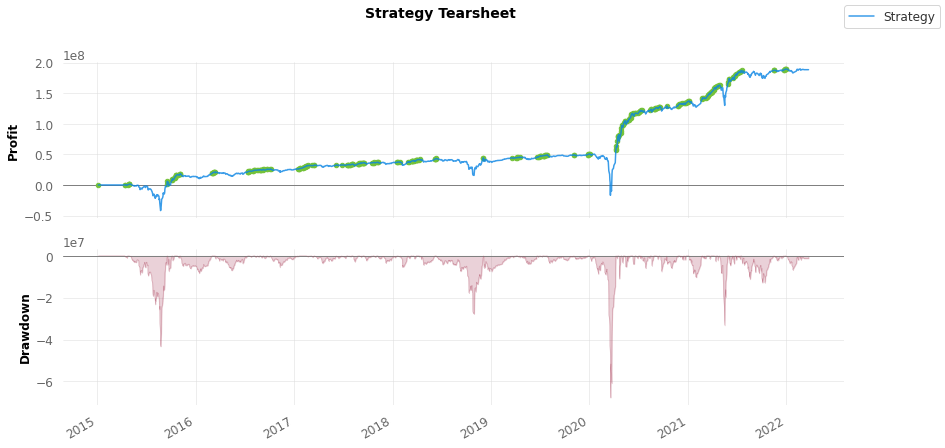

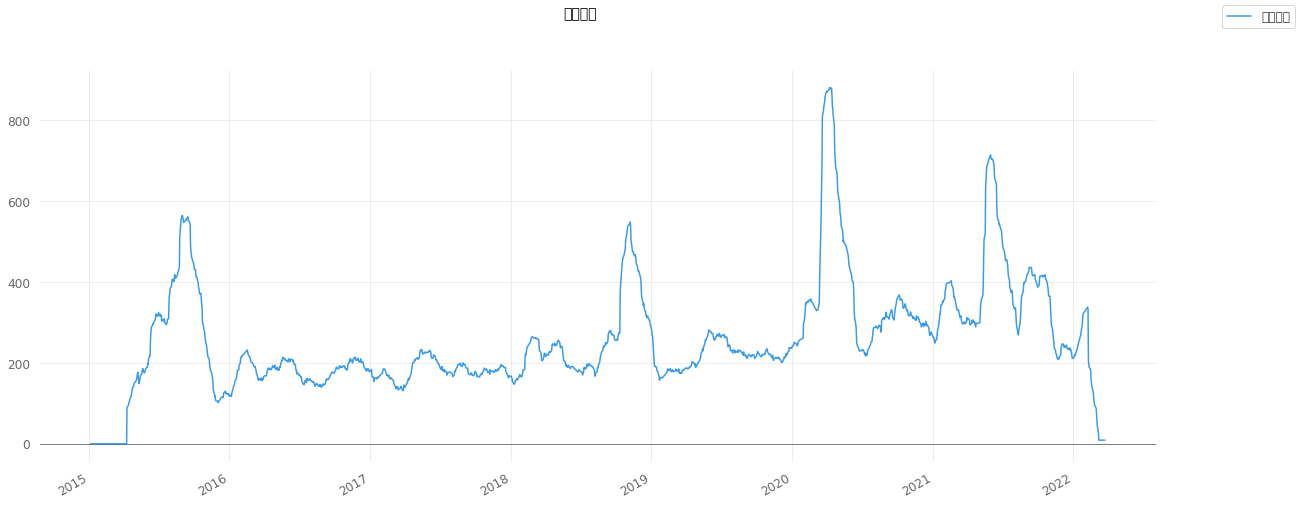

CPU times: total: 57.6 s
Wall time: 58.9 s


In [ ]:
%%time
import importlib
%load_ext autoreload
%autoreload 2
importlib.reload(st)

backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=500000)
report = backtest.run(strategy_map)
# profit = backtest.run(strategy_map)
# report = backtest.getDetailInfo(strategy_map)
profit = backtest.profit

In [ ]:
%%time
df_stock = backtest.read_stock()
df_stock

CPU times: total: 4.05 s
Wall time: 4.04 s


,進場張數,不含成本進場價,不含成本出場價,不含成本獲利趴數,進場時間,出場時間,持有天數
證券代碼,,,,,,,
1101 台泥,20.0,24.1670,23.1451,-4.228493,2015-04-10,2015-05-25,45.0
1203 味王,28.0,17.7086,17.4466,-1.479507,2015-04-10,2015-05-29,49.0
1216 統一,12.0,38.9512,36.6773,-5.837818,2015-04-10,2015-05-08,28.0
1229 聯華,56.0,8.9106,8.9965,0.964020,2015-04-10,2015-05-11,31.0
1232 大統益,8.0,55.7592,54.9877,-1.383628,2015-04-10,2015-05-29,49.0
...,...,...,...,...,...,...,...
4552 力達-KY,15.0,32.4000,33.1000,2.160494,2022-02-07,2022-03-07,28.0
5609 中菲行,4.0,102.0000,101.0000,-0.980392,2022-02-07,2022-03-07,28.0
6237 驊訊,6.0,79.8000,76.5000,-4.135338,2022-02-07,2022-03-07,28.0


In [ ]:
# %%time

# df['放在最後用'] = 1
# strategy_map = {
#   '進場': (
#     (df.index.get_level_values(1) == '3035 智原') &
#     (df.groupby('證券代碼')['是否有波段驅使之融資'].shift(1) == 1) &
#     (df.groupby('證券代碼')['融資是否落底'].shift(1) == 1) &
#     (df['放在最後用'] == 1)
#   ),
#   '出場': (
#     (df.groupby('證券代碼')['是否有波段驅使之融資'].shift(6) == 1) &
#     (df.groupby('證券代碼')['融資是否落底'].shift(6) == 1) &
#     (df['放在最後用'] == 1)
#   )
# }

In [ ]:
backtest.df_position

證券代碼,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,1213 大飲,1215 卜蜂,1216 統一,1217 愛之味,1218 泰山,1219 福壽,1220 台榮,1225 福懋油,1227 佳格,1229 聯華,1231 聯華食,1232 大統益,1233 天仁,1234 黑松,1235 興泰,...,9927 泰銘,9928 中視,9929 秋雨,9930 中聯資源,9931 欣高,9933 中鼎,9934 成霖,9935 慶豐富,9937 全國,9938 百和,9939 宏全,9940 信義,9941 裕融,9942 茂順,9943 好樂迪,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,總報酬,持有最大支數,總交易次數,每筆投入金額,均筆獲利,均筆獲利％,勝率
0,1.885541e+08,880.0,13057.0,500000.0,14440.847724,2.88817,54.729264


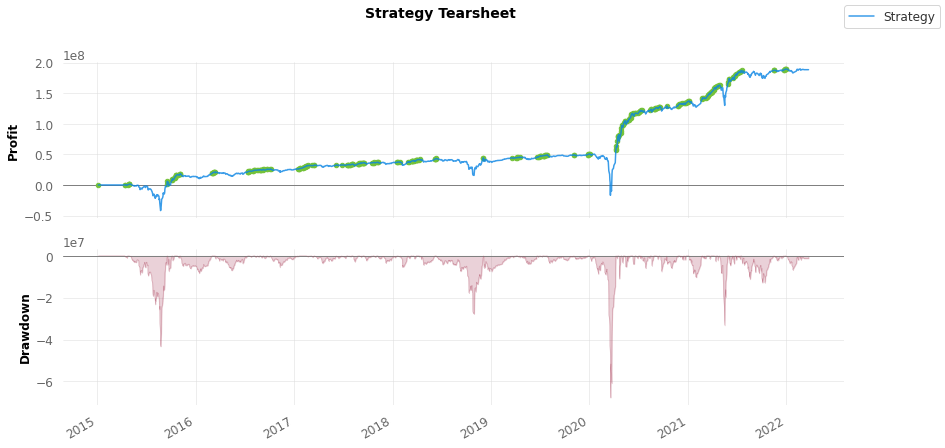

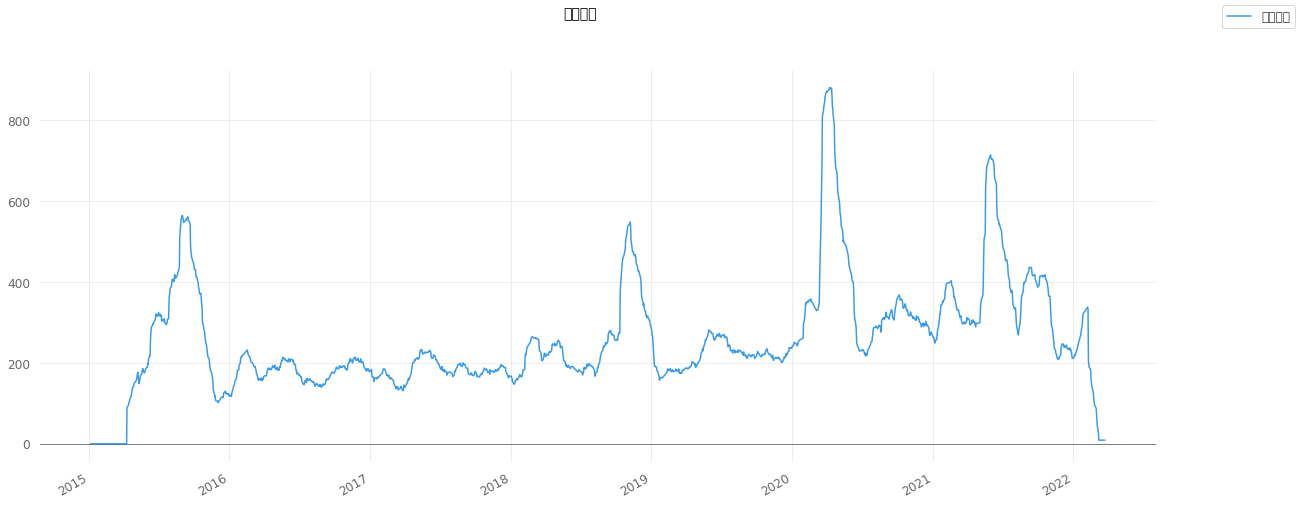

CPU times: total: 57.2 s
Wall time: 57.5 s


In [ ]:
%%time
import importlib
%load_ext autoreload
%autoreload 2
importlib.reload(st)

backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=500000)
report = backtest.run(strategy_map)
# profit = backtest.run(strategy_map)
# report = backtest.getDetailInfo(strategy_map)
profit = backtest.profit

In [ ]:
%%time
df_stock = backtest.read_stock()
df_stock

CPU times: total: 3.62 s
Wall time: 3.64 s


,進場張數,不含成本進場價,不含成本出場價,不含成本獲利趴數,進場時間,出場時間,持有天數
證券代碼,,,,,,,
1101 台泥,20.0,24.1670,23.1451,-4.228493,2015-04-10,2015-05-25,45.0
1203 味王,28.0,17.7086,17.4466,-1.479507,2015-04-10,2015-05-29,49.0
1216 統一,12.0,38.9512,36.6773,-5.837818,2015-04-10,2015-05-08,28.0
1229 聯華,56.0,8.9106,8.9965,0.964020,2015-04-10,2015-05-11,31.0
1232 大統益,8.0,55.7592,54.9877,-1.383628,2015-04-10,2015-05-29,49.0
...,...,...,...,...,...,...,...
4552 力達-KY,15.0,32.4000,33.1000,2.160494,2022-02-07,2022-03-07,28.0
5609 中菲行,4.0,102.0000,101.0000,-0.980392,2022-02-07,2022-03-07,28.0
6237 驊訊,6.0,79.8000,76.5000,-4.135338,2022-02-07,2022-03-07,28.0
